<a href="https://colab.research.google.com/github/spch88/my_project/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BF%D0%B0%D1%81%D1%81%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя базу "Пассажиры автобуса", подготовьте данные для обучения нейронной сети, классифицирующей изображение на два класса:
- входящий пассажир
- выходящий пассажир

Добейтесь точности работы модели на проверочной выборке не ниже 85%

Ссылка на датасет: https://storage.googleapis.com/terra_ai/DataSets/bus.zip

Информацию о загрузке изображений и преобразовании их в numnpy-массивы вы можете найти в Базе знаний:


In [ ]:
# загрузка библиотек
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image 
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 
import os
import pandas as pd
%matplotlib inline

In [ ]:
# загружаем изображения
import gdown
gdown.download('https://storage.googleapis.com/terra_ai/DataSets/bus.zip', None, quiet=True)

'bus.zip'

In [ ]:
!unzip -q bus.zip

replace getting_off/00000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
x_train = []
y_train = []

img_height = 100
img_width = 100

# загрузка изображений входящих пассажиров
base_dir = '/content/entering'
for patch in os.listdir(base_dir):
    path_file = base_dir + '/' + patch
    x_train.append(image.img_to_array(image.load_img(path_file, target_size=(img_height, img_width), color_mode='grayscale')))
    y_train.append(0)

# загрузка изображений выходящих пассажиров
base_dir = '/content/getting_off'
for patch in os.listdir(base_dir):
    path_file = base_dir + '/' + patch
    x_train.append(image.img_to_array(image.load_img(path_file, target_size=(img_height, img_width), color_mode='grayscale')))
    y_train.append(1)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train = np.array(x_train)
y_train = np.array(y_train)
# подготовка данных
x_train_res = x_train.reshape(x_train.shape[0], -1)
x_train_res = x_train_res.astype('float32') / 255.
y_train_res = utils.to_categorical(y_train, 2)

# разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(x_train_res, y_train_res, test_size=0.1, shuffle=True, random_state=0)

In [ ]:
# создаем модель НС
COUNT_INPUT = 10000 # количество входных параметров
COUNT_CLASS = 2 # количество классов

# определение функции, реализующей структуру НС
def CreateModel1(n_neuron1, n_neuron2):
  model = Sequential()

  model.add(Dense(n_neuron1, input_dim=COUNT_INPUT, activation='relu'))
  model.add(Dense(n_neuron2, activation='relu'))
  model.add(Dense(COUNT_CLASS, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_split=0.1, verbose=1)   
  scores = model.evaluate(X_test, Y_test, verbose=0)

  return history, scores

In [ ]:
# набор параметров НС1
parameter1 = [1000, 900, 800, 700, 600, 500, 400, 300, 200, 100]  # количество нейронов входного слоя 
parameter2 = [200, 150, 125, 100, 80, 60, 50, 40, 20, 10]  # количество нейронов скрытого слоя

# списки для записи результатов обучения сети
acc, val_acc, test = [],[],[]
parameter11, parameter21 = [],[]

# тестирование НС
for i in range(10):
  parameter11.append(parameter1[i])
  parameter21.append(parameter2[i])
  history, scores = CreateModel1(parameter1[i], parameter2[i])
  acc.append(round(history.history['accuracy'][len(history.history['accuracy']) - 1], 4))
  val_acc.append(round(history.history['val_accuracy'][len(history.history['val_accuracy']) - 1], 4))
  test.append(round(scores[1], 4))

df = pd.DataFrame({'Вх. слой, шт.': parameter11,
                    'Скрытый слой, шт.': parameter21, 
                    'Точность на тренировочной выборке': acc,
                    'Точность на проверочной выборке': val_acc,
                    'Точность на тестовой выборке': test})

Epoch 1/100
58/58 [==============================] - 1s 17ms/step - loss: 2.8996 - accuracy: 0.6361 - val_loss: 0.5762 - val_accuracy: 0.7054
Epoch 2/100
58/58 [==============================] - 1s 13ms/step - loss: 0.5575 - accuracy: 0.7362 - val_loss: 0.5402 - val_accuracy: 0.7518
Epoch 3/100
58/58 [==============================] - 1s 12ms/step - loss: 0.5220 - accuracy: 0.7588 - val_loss: 0.5288 - val_accuracy: 0.7494
Epoch 4/100
58/58 [==============================] - 1s 12ms/step - loss: 0.5065 - accuracy: 0.7597 - val_loss: 0.5497 - val_accuracy: 0.7286
Epoch 5/100
58/58 [==============================] - 1s 12ms/step - loss: 0.5656 - accuracy: 0.7415 - val_loss: 0.5348 - val_accuracy: 0.7531
Epoch 6/100
58/58 [==============================] - 1s 13ms/step - loss: 0.5589 - accuracy: 0.7357 - val_loss: 0.6606 - val_accuracy: 0.7152
Epoch 7/100
58/58 [==============================] - 1s 12ms/step - loss: 0.4720 - accuracy: 0.7808 - val_loss: 0.4697 - val_accuracy: 0.7873
Epoch 

In [ ]:
# вывод результатов обучения НС
df

,"Вх. слой, шт.","Скрытый слой, шт.",Точность на тренировочной выборке,Точность на проверочной выборке,Точность на тестовой выборке
0,1000,200,0.9976,0.9621,0.9593
1,900,150,0.9943,0.9548,0.9450
2,800,125,0.9951,0.9658,0.9450
3,700,100,0.9101,0.9120,0.9120
4,600,80,0.9935,0.9389,0.9197
5,500,60,0.9710,0.8704,0.8559
6,400,50,0.9958,0.9584,0.9538
7,300,40,0.9893,0.9499,0.9274
8,200,20,0.9631,0.9291,0.9197
9,100,10,0.9328,0.8606,0.8537


In [ ]:
# исследуем более детально произвольно взятую подходящую по точности модель
model = Sequential()
model.add(Dense(1000, input_dim=10000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_split=0.1, verbose=1)   

Epoch 1/100
58/58 [==============================] - 1s 17ms/step - loss: 2.0967 - accuracy: 0.6437 - val_loss: 0.5478 - val_accuracy: 0.7372
Epoch 2/100
58/58 [==============================] - 1s 13ms/step - loss: 0.5746 - accuracy: 0.7196 - val_loss: 0.5362 - val_accuracy: 0.7518
Epoch 3/100
58/58 [==============================] - 1s 14ms/step - loss: 0.6136 - accuracy: 0.7144 - val_loss: 0.5291 - val_accuracy: 0.7616
Epoch 4/100
58/58 [==============================] - 1s 13ms/step - loss: 0.5668 - accuracy: 0.7363 - val_loss: 0.4989 - val_accuracy: 0.7665
Epoch 5/100
58/58 [==============================] - 1s 12ms/step - loss: 0.4954 - accuracy: 0.7711 - val_loss: 0.7086 - val_accuracy: 0.7323
Epoch 6/100
58/58 [==============================] - 1s 12ms/step - loss: 0.4743 - accuracy: 0.7884 - val_loss: 0.4897 - val_accuracy: 0.7677
Epoch 7/100
58/58 [==============================] - 1s 12ms/step - loss: 0.4833 - accuracy: 0.7728 - val_loss: 0.4562 - val_accuracy: 0.7836
Epoch 

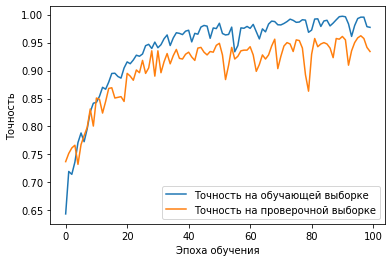

In [ ]:
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на проверочной выборке')

plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

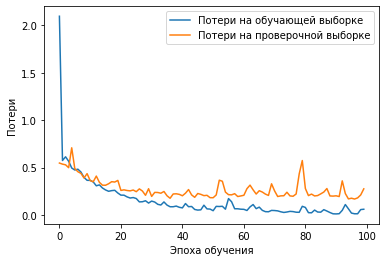

In [ ]:
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на проверочной выборке')

plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print(f"Точность на проверочной выборке: {round(history.history['val_accuracy'][99], 4) * 100}")
print(f"Точность на тестовой выборке: {round(scores[1], 4) * 100}")

Точность на проверочной выборке: 93.4
Точность на тестовой выборке: 92.30000000000001


Из графиков видно, что эффект переобучения отсутствует, оптимизировать сеть не обязательно. Требуемая в задании точность достигнута.